<a href="https://colab.research.google.com/github/wanutchapornmun/229352-StatisticalLearning/blob/main/Lab07_Boosted_trees_660510561.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Boosted tree models on a simulated dataset

- [AdaBoostClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn-ensemble-adaboostclassifier)
- [XGBClassifier documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
- [LGBMClassifier documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm-lgbmclassifier)
- [GridSeachCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


- [Data](https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip)


Perform GridSearchCV of the following three models on the provided training set (`X_train.csv` and `y_train.csv`)

1. Evaluate these models on the test set (`X_test.csv` and `y_test.csv`). **Keep searching (using cross-validation) until you find the model that achieves > 0.83 out-of-fold accuracy (use `GridSeachCV.best_score_` to obtain the out-of-fold accuracy)**

2. Report the test accuracy of your best model.

3. For each model, plot the feature importances

For `AdaBoostClassifier`, feature importances can be obtained by calling the `feature_importances_` attribute after fitting the model.

For `XGBClassifier` and `LGBMClassifier`, feature importances can be obtained using the library’s `plot_importance` function. Here is a minimal example in XGBoost:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, plot_importance
from lightgbm import LGBMClassifier


In [2]:
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
from sklearn.ensemble import AdaBoostClassifier


ab = AdaBoostClassifier()
ab.fit(X, y)
ab.feature_importances_

array([0.        , 0.05832968, 0.34289525, 0.59877508])

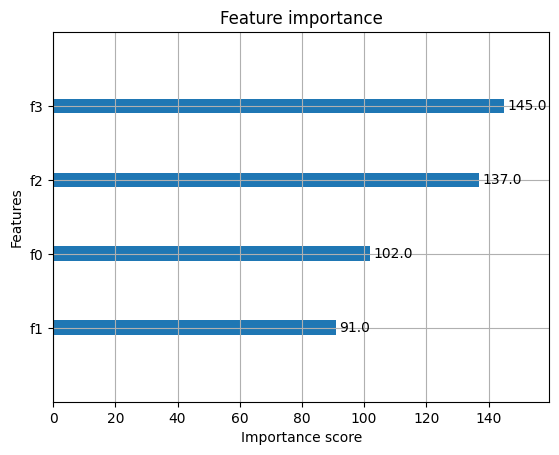

In [4]:
from xgboost import XGBClassifier, plot_importance


model = XGBClassifier()
model.fit(X, y)
plot_importance(model);

In [5]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


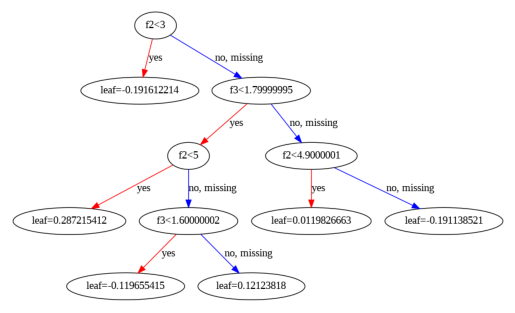

In [6]:
from xgboost import plot_tree

plot_tree(model, num_trees=4);

In [7]:
import pandas as pd

X_train = pd.read_csv('X_train.csv', header=None)
y_train = pd.read_csv('y_train.csv', header=None).values.ravel()

X_test = pd.read_csv('X_test.csv', header=None)
y_test = pd.read_csv('y_test.csv', header=None).values.ravel()


X_train



,0,1,2,3,4,5,6,7,8,9,10,11,12
0,39.0,0.0,2.0,94.0,199.0,0.0,1.0,179.0,0.0,0.0,2.0,0.0,2.0
1,29.0,1.0,1.0,130.0,204.0,0.0,0.0,202.0,0.0,0.0,2.0,0.0,2.0
2,50.0,0.0,2.0,120.0,219.0,0.0,1.0,158.0,0.0,1.6,1.0,0.0,2.0
3,54.0,1.0,0.0,140.0,239.0,0.0,1.0,160.0,0.0,1.2,2.0,0.0,2.0
4,38.0,1.0,2.0,138.0,175.0,0.0,1.0,173.0,0.0,0.0,2.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,50.0,1.0,2.0,140.0,233.0,0.0,1.0,163.0,0.0,0.6,1.0,1.0,3.0
208,51.0,1.0,2.0,94.0,227.0,0.0,1.0,154.0,1.0,0.0,2.0,1.0,3.0
209,69.0,1.0,3.0,160.0,234.0,1.0,0.0,131.0,0.0,0.1,1.0,1.0,2.0
210,46.0,1.0,0.0,120.0,249.0,0.0,0.0,144.0,0.0,0.8,2.0,0.0,3.0


In [9]:
ada = AdaBoostClassifier(random_state=42)

param_grid_ada = {'n_estimators': [50, 100, 200],
                  'learning_rate': [0.01, 0.1, 1.0]}

grid_ada = GridSearchCV(ada,
                        param_grid_ada,
                        cv=5,
                        scoring='accuracy')

grid_ada.fit(X_train, y_train)

print("Best CV accuracy for AdaBoost:", grid_ada.best_score_)
print("Best parameters:", grid_ada.best_params_)

Best CV accuracy for AdaBoost: 0.8441860465116278
Best parameters: {'learning_rate': 0.1, 'n_estimators': 50}


In [10]:
ada_best = grid_ada.best_estimator_
y_pred_ada = ada_best.predict(X_test)

print("AdaBoost test accuracy:", accuracy_score(y_test, y_pred_ada))

AdaBoost test accuracy: 0.8461538461538461


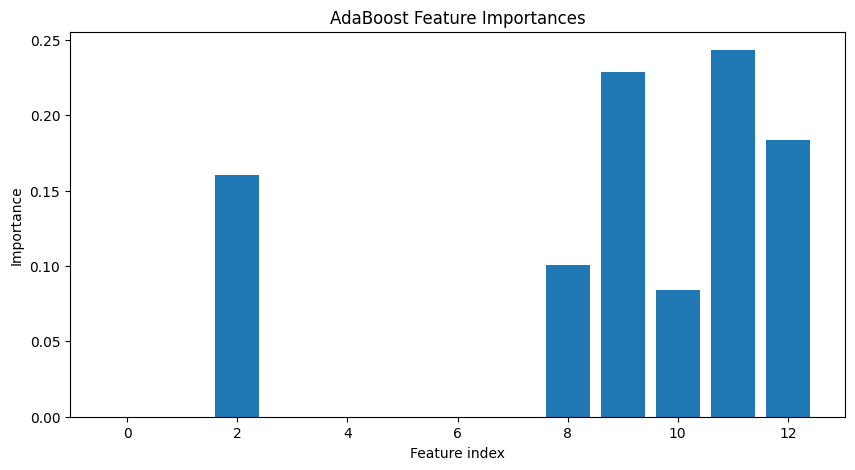

In [19]:
plt.figure(figsize=(10, 5))
plt.bar(range(X_train.shape[1]), ada_best.feature_importances_)
plt.xlabel("Feature index")
plt.ylabel("Importance")
plt.title("AdaBoost Feature Importances")
plt.show()

In [24]:
xgb = XGBClassifier(use_label_encoder=False,
                    eval_metric='logloss',
                    random_state=100)

param_grid_xgb = {'n_estimators': [100, 200],
                  'max_depth': [3, 5],
                  'learning_rate': [0.05, 0.1]}

grid_xgb = GridSearchCV(xgb,
                        param_grid_xgb,
                        cv=5,
                        scoring='accuracy')

grid_xgb.fit(X_train, y_train)

print("Best CV accuracy:", grid_xgb.best_score_)
print("Best parameters:", grid_xgb.best_params_)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:41:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:41:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:41:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:41:33] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:41:33] WARNING: /w

Best CV accuracy: 0.8110741971207089
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [25]:
print("Best CV accuracy for XGBoost:", grid_xgb.best_score_)
print("Best parameters:", grid_xgb.best_params_)

Best CV accuracy for XGBoost: 0.8110741971207089
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [26]:
xgb_best = grid_xgb.best_estimator_
y_pred_xgb = xgb_best.predict(X_test)

print("XGBoost test accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost test accuracy: 0.8241758241758241


In [27]:
lgbm = LGBMClassifier(random_state=42)

param_grid_lgbm = {'n_estimators': [100, 200],
                   'max_depth': [3, 5, -1],
                   'learning_rate': [0.05, 0.1]}

grid_lgbm = GridSearchCV(lgbm,
                         param_grid_lgbm,
                         cv=5,
                         scoring='accuracy')

grid_lgbm.fit(X_train, y_train)

print("Best CV accuracy for LightGBM:", grid_lgbm.best_score_)
print("Best parameters:", grid_lgbm.best_params_)


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [28]:
print("Best CV accuracy for LightGBM:", grid_lgbm.best_score_)
print("Best parameters:", grid_lgbm.best_params_)

Best CV accuracy for LightGBM: 0.8017718715393134
Best parameters: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200}


In [29]:
lgbm_best = grid_lgbm.best_estimator_
y_pred_lgbm = lgbm_best.predict(X_test)

print("LightGBM test accuracy:", accuracy_score(y_test, y_pred_lgbm))

LightGBM test accuracy: 0.8131868131868132


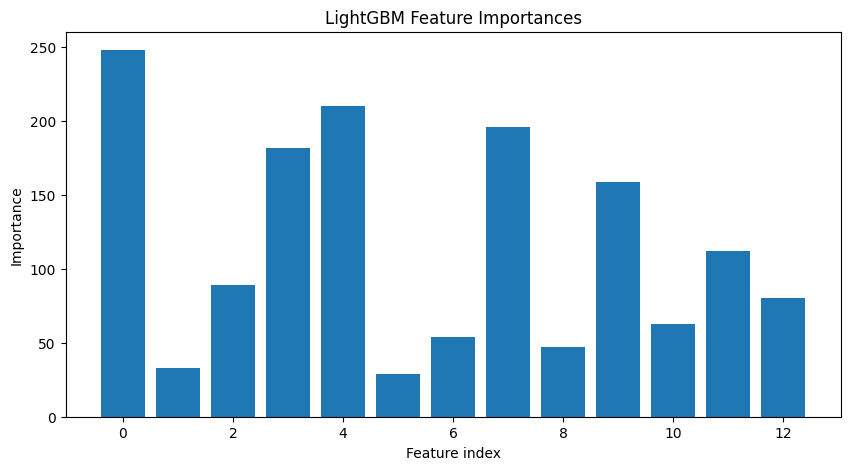

In [31]:
import matplotlib.pyplot as plt
import numpy as np

importances = lgbm_best.feature_importances_

plt.figure(figsize=(10,5))
plt.bar(range(len(importances)), importances)
plt.xlabel("Feature index")
plt.ylabel("Importance")
plt.title("LightGBM Feature Importances")
plt.show()

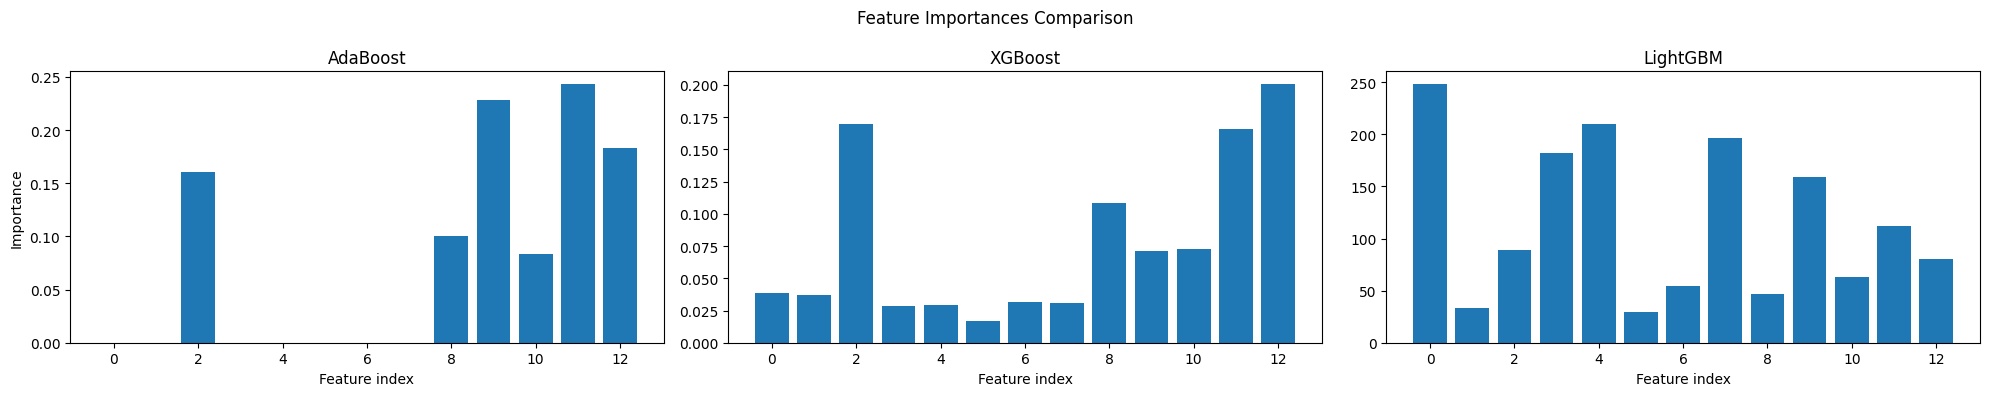

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4), sharey=False)

ada_importance = ada_best.feature_importances_
axes[0].bar(range(len(ada_importance)), ada_importance)
axes[0].set_title("AdaBoost")
axes[0].set_xlabel("Feature index")
axes[0].set_ylabel("Importance")

xgb_importance = xgb_best.feature_importances_
axes[1].bar(range(len(xgb_importance)), xgb_importance)
axes[1].set_title("XGBoost")
axes[1].set_xlabel("Feature index")

lgbm_importance = lgbm_best.feature_importances_
axes[2].bar(range(len(lgbm_importance)), lgbm_importance)
axes[2].set_title("LightGBM")
axes[2].set_xlabel("Feature index")

plt.suptitle("Feature Importances Comparison")
plt.tight_layout()
plt.show()

# `ดังนั้น AdaBoost ดีที่สุด`